# Processamento de Linguagem Natural - Instituto Metr√≥pole Digital 
### Etapa 1 - An√°lise de Sentimento do Twitter dos presidenci√°veis de 2023 

- Docente:
    - Dr. Elias Jacob de Menezes Neto
- Discentes:
    - Igor Michael Araujo de Macedo
    - Keven Alison dos Santos Bezerra
    - Larissa Kelmer de Menezes Silva
    - Vin√≠cius Soares Fernandes

Este notebook tem como objetivo o desenvolvimento da avalia√ß√£o 1 da displina IMD1107 - Processamento de Linguagem Natural, cujo estudo se baseia na coleta e tratamento de dados de um data set PLN, realizando as principais etapas de limpeza de dados.

A ideia em torno dos dados escolhidos para este projeto se baseia em observar o comportamento dos principais candidatos √† Presid√™ncia do Brasil, Lula e Bolsonaro, atrav√©s do conte√∫do postado em suas respectivas p√°ginas do twitter.

## Sum√°rio

1. [Configura√ß√µes Iniciais](#config-inic)
2. [Pr√©-processamento](#preprocessamento)


## Configura√ß√µes Iniciais

Inicialmente foi realizada a configura√ß√£o geral do nosso ambiente de trabalho, realizando a importa√ß√£o dos dados e bibliotecas necess√°rias para sua devida execu√ß√£o no contexto do tema e da √°rea de PLN.

### Configura√ß√µes Gerais

Inclui a instala√ß√£o de pacotes, importa√ß√£o de bibliotecas, download de recursos.

In [2]:
import os
# Detect if we are using Google Colab
try:
    from google.colab import drive
    IN_COLAB = True
except:
    IN_COLAB = False

if IN_COLAB:
    drive.mount('/content/drive')

In [3]:
# Instala√ß√£o dos pacotes necess√°rios

!pip install -qq transformers
!pip install unidecode
!pip install enelvo
!pip install wordcloud
!python -m spacy download pt_core_news_sm
#!pip install --upgrade spacy
!pip install -r requirements.txt
!pip install aiohttp_socks
!pip install fake_useragent
!pip install googletransx

#! git clone https://bitbucket.org/HBrum/tweetsentbr.git ----> get emojis sentiments

     ---------------------------------------- 0.0/13.0 MB ? eta -:--:--
     -- ------------------------------------- 0.7/13.0 MB 14.2 MB/s eta 0:00:01
     ---- ----------------------------------- 1.6/13.0 MB 16.8 MB/s eta 0:00:01
     ------- -------------------------------- 2.4/13.0 MB 19.3 MB/s eta 0:00:01
     ---------- ----------------------------- 3.4/13.0 MB 19.5 MB/s eta 0:00:01
     ----------- ---------------------------- 3.9/13.0 MB 19.1 MB/s eta 0:00:01
     ------------- -------------------------- 4.5/13.0 MB 16.8 MB/s eta 0:00:01
     ---------------- ----------------------- 5.3/13.0 MB 16.8 MB/s eta 0:00:01
     ------------------- -------------------- 6.4/13.0 MB 17.9 MB/s eta 0:00:01
     ---------------------- ----------------- 7.4/13.0 MB 18.2 MB/s eta 0:00:01
     ------------------------- -------------- 8.4/13.0 MB 18.5 MB/s eta 0:00:01
     ---------------------------- ----------- 9.3/13.0 MB 18.5 MB/s eta 0:00:01
     ------------------------------- ------- 10.

  error: subprocess-exited-with-error
  
  √ó python setup.py egg_info did not run successfully.
  ‚îÇ exit code: 1
  ‚ï∞‚îÄ> [20 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\larissa.silva\AppData\Local\Temp\pip-install-k7d5tava\cffi_2207edc95b7241b594fb3c24b52757de\setup.py", line 127, in <module>
          if sys.platform == 'win32' and uses_msvc():
        File "C:\Users\larissa.silva\AppData\Local\Temp\pip-install-k7d5tava\cffi_2207edc95b7241b594fb3c24b52757de\setup.py", line 105, in uses_msvc
          return config.try_compile('#ifndef _MSC_VER\n#error "not MSVC"\n#endif')
        File "C:\Users\larissa.silva\AppData\Local\miniconda3\envs\vm\lib\site-packages\setuptools\_distutils\command\config.py", line 220, in try_compile
          self._compile(body, headers, include_dirs, lang)
        File "C:\Users\larissa.silva\AppData\Local\minicon

In [29]:
# Importa√ß√£o das bibliotecas necess√°rias

%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import seaborn as sns
import unidecode
import re
import os
from string import punctuation
from enelvo.normaliser import Normaliser
from nltk import ngrams
import nltk
from nltk import tokenize
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import FunctionTransformer
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import statistics
import string
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


In [280]:
nlp = spacy.load('pt_core_news_sm')
nltk.download('stopwords')
nltk.download('punkt')
#nltk.download('all')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\larissa.silva\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\larissa.silva\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [236]:
pd.set_option('display.max_colwidth', None)

### Configura√ß√µes da API e Requisi√ß√£o de Dados

A fim de criar um dataset que atenda aos prop√≥sitos deste trabalho, a an√°lise de sentimento de tu√≠tes, 
fez-se uso de uma ferramenta na linguagem Python, a [Optimized-Modified-GetOldTweets3 (OMGOT)](https://github.com/marquisvictor/Optimized-Modified-GetOldTweets3-OMGOT/tree/master), baseada 
na pr√≥pria [Application Programming Interface (API)](https://developer.twitter.com/en/docs/twitter-api), ou Interface de Programa√ß√£o de Aplica√ß√£o, do Twitter. 
O diferencial dessa plataform ÃÅe a n√£o necessidade de se ter uma conta na plataforma, a quantidade de tu√≠tes 
retornados na busca - a API do Twitter se limita a 500 por m√™s, e a possibilidade de que buscas mais 
extensas sejam feitas em contas de usu√°rios terceiros. Por ser a OMGOT  ÃÅe uma ferramenta derivada da 
API do Twitter, o retorno da sua busca mant√©m os mesmos par√¢metros das reornadas pela outra ferramenta.

> Observa√ß√£o: Apesar de retornar grandes volumes de dados, a OMGOT n√£o exclui a possibilidade de n√£o ter 
conseguido devolver todos os tu√≠tes buscados.



##### Fomato para requisi√ß√£o da API
> ! python cli.py --username <user> --until/since <ano-m√™s-dia> -o <nome_arquivo.extens√£o> --csv <extens√£o>

In [6]:
os.chdir(r'.\pln\projeto_etapa1')

print(os.getcwd())

# Clone the entire repo
!git clone -b fix-api https://github.com/marquisvictor/Optimized-Modified-GetOldTweets3-OMGOT.git

C:\Users\larissa.silva\Documents\pessoal\UFRN\2024.1\pln\projeto_etapa1


Cloning into 'Optimized-Modified-GetOldTweets3-OMGOT'...


In [38]:
os.chdir('Optimized-Modified-GetOldTweets3-OMGOT')
os.chdir('GetOldTweets3-0.0.10')
os.chdir('..')

print(os.getcwd())

C:\Users\larissa.silva\Documents\pessoal\UFRN\2024.1\pln\projeto_etapa1


#### Importa√ß√£o do DataFrame com dados de cada candidato

> Inclui a sele√ß√£o de features do DF, para incluir apenas o nome do candidato e o texto dos tu√≠tes

#### Lula

In [ ]:
#!python cli.py --username "LulaOficial" --until "2018-04-07" -o lula1.csv --csv
#!python cli.py --username "LulaOficial" --since "2024-04-01" -o lula2.csv --csv
#lula1 = pd.read_csv('/content/drive/MyDrive/UFRN/2024/2024.1/pln/projeto_etapa1/lulaxboroliro/lula1.csv')
#lula2 = pd.read_csv('/content/drive/MyDrive/UFRN/2024/2024.1/pln/projeto_etapa1/lulaxboroliro/lula2.csv')
#lula_df = pd.concat([lula1, lula2])
#lula_df = lula_df.sort_values(by=['created_at'], ascending=False)

In [40]:
lula_df = pd.read_csv('.\data\lula_df.csv')
lula_df = lula_df.reset_index(drop=True)
lula_df.head()

date      time  name  \
0  2022-08-08  20:33:10  Lula   
1  2022-08-08  18:07:24  Lula   
2  2022-08-08  14:42:08  Lula   
3  2022-08-08  10:32:04  Lula   
4  2022-08-07  21:50:14  Lula   

                                               tweet  replies_count  \
0  O Brasil piorou. A nova pesquisa do boletim De...            299   
1  N√≥s estamos disputando com algu√©m que prometeu...           1369   
2  As mentiras contra Lula j√° aconteciam antes me...            705   
3  Aprendi com minha m√£e a n√£o desistir. Quando v...           3645   
4  "Um dos meus sonhos √© um dia estudar medicina....           1252   

   retweets_count  likes_count  
0             394         2383  
1             845         6106  
2             998         4201  
3            1750        16921  
4             860         5902

In [41]:
print(f'Formato DF Lula: {np.shape(lula_df)}')

Formato DF Lula: (15140, 7)


In [42]:
print('Informa√ß√µes DF Lula:\n')

print(lula_df.info())

Informa√ß√µes DF Lula:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15140 entries, 0 to 15139
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            15140 non-null  object
 1   time            15140 non-null  object
 2   name            15140 non-null  object
 3   tweet           15140 non-null  object
 4   replies_count   15140 non-null  int64 
 5   retweets_count  15140 non-null  int64 
 6   likes_count     15140 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 828.1+ KB
None


In [ ]:
print(lula_df.isna().any())

date              False
time              False
name              False
tweet             False
replies_count     False
retweets_count    False
likes_count       False
dtype: bool


In [ ]:
lula_df.drop(['replies_count', 'retweets_count', 'likes_count', 'time', 'date'], axis=1, inplace=True)

In [ ]:
lula_df.drop_duplicates(['tweet'], inplace = True)

In [ ]:
lula_df.to_csv(".\data\lula_df.csv", index=False)

#### Bolsonaro

In [ ]:
#!python cli.py --username "jairbolsonaro" -o bolsonaro.csv --csv

In [44]:
bolsonaro_df = pd.read_csv(r'.\data\bolsonaro_df.csv')

In [45]:
bolsonaro_df.head()

date      time               name  \
0  2022-08-08  20:26:17  Jair M. Bolsonaro   
1  2022-08-08  16:29:03  Jair M. Bolsonaro   
2  2022-08-08  16:29:03  Jair M. Bolsonaro   
3  2022-08-08  16:29:02  Jair M. Bolsonaro   
4  2022-08-08  09:35:36  Jair M. Bolsonaro   

                                               tweet  replies_count  \
0  Acompanhe, no hor√°rio, ao vivo, pelo Canal do ...            587   
1  - Entre os planos aplicados pela atual gest√£o ...            123   
2  - Recentemente priorizando o saneamento b√°sico...            113   
3  - Longe do PT,  BNDES que patrocinava obras em...            937   
4  - Tamb√©m, a amplia√ß√£o do Teto do financiamento...            183   

   retweets_count  likes_count  
0            2966        14734  
1            1523        10129  
2            1785        11423  
3            5075        23381  
4            2154        12326

In [47]:
print(f'Formato DF Bolsonaro: {np.shape(bolsonaro_df)}')

Formato DF Bolsonaro: (12540, 7)


In [48]:
print('Informa√ß√µes DF Bolsonaro:\n')

print(bolsonaro_df.info())

Informa√ß√µes DF Bolsonaro:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12540 entries, 0 to 12539
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            12540 non-null  object
 1   time            12540 non-null  object
 2   name            12540 non-null  object
 3   tweet           12540 non-null  object
 4   replies_count   12540 non-null  int64 
 5   retweets_count  12540 non-null  int64 
 6   likes_count     12540 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 685.9+ KB
None


In [49]:
print(bolsonaro_df.isna().any())

date              False
time              False
name              False
tweet             False
replies_count     False
retweets_count    False
likes_count       False
dtype: bool


In [50]:
bolsonaro_df.drop_duplicates(['tweet'], inplace = True)

In [51]:
bolsonaro_df.drop(['replies_count', 'retweets_count', 'likes_count', 'time', 'date'], axis=1, inplace=True)

In [ ]:
bolsonaro_df.to_csv(r'.\data\bolsonaro_df.csv', index = False)

## Pr√©-processamento

In [85]:
lula_df = pd.read_csv(r'.\data\lula_df.csv', encoding='utf-8')
bolsonaro_df = pd.read_csv(r'.\data\bolsonaro_df.csv', encoding='utf-8')

### Padroniza√ß√£o

Uma vez que o conjunto de dados √© pequeno, desbalanceamentos (pequenos) t√™m maior relev√¢ncia do que
para um conjunto grande de dados. Dessa forma, optou-se por manter a mesma quantidade de dados para
cada um dos candidatos.

In [7]:
lula_df.tweet.count()

15140

In [8]:
bolsonaro_df.tweet.count()

12540

In [119]:
lula_df = lula_df[:12540]

In [120]:
lula_df.tweet.count()

12540

### Visualiza√ß√£o Pr√©via

Essa se√ß√£o √© uma demonstra√ß√£o da necessidade de limpeza dos dados antes de se poder obter epifanias sobre eles, al√©m de definir fun√ß√µes que poder√£o, mais tarde, ser usadas para visualiza√ß√£o gr√°fica dos dados.

In [86]:
def generate_wordcloud_from_df_column(df, column_name, nome):
    # Concatena todos os textos da coluna em uma √∫nica string
    text = ' '.join(df[column_name].astype(str).tolist())
    
    word_freq = Counter(text.split())
    
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Nuvem de Palavras de '+nome+'\n')
    plt.show()

In [87]:
def graf_pareto(texto, coluna_texto, quantidade, nome):
  todas_palavras = ' '.join([resenha for resenha in texto[coluna_texto]])
  token_frase = nltk.tokenize.WhitespaceTokenizer().tokenize(todas_palavras)
  frequencias = nltk.FreqDist(token_frase)
  df_frequencias = pd.DataFrame({'Palavras': frequencias.keys(),
                               'Frequencia': frequencias.values()})

  df_frequencias = df_frequencias.nlargest(n=quantidade, columns='Frequencia')

  total = df_frequencias['Frequencia'].sum()
  df_frequencias['Porcentagem'] = (df_frequencias['Frequencia'].cumsum() / total) * 100

  plt.figure(figsize = (12,8))
  ax = sns.barplot(data = df_frequencias, x = 'Palavras', y = 'Frequencia', color = 'lightblue')
  ax2 = ax.twinx()
  sns.lineplot(data = df_frequencias, x = 'Palavras', y = 'Porcentagem', color = 'red', sort = False, ax = ax2)
  plt.title('Gr√°fico de Pareto de '+nome)
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
  plt.show()

In [88]:
todas_palavras_lula = set(' '.join([tweet for tweet in lula_df.tweet]))
todas_palavras_bolsonaro = set(' '.join([tweet for tweet in bolsonaro_df.tweet]))
print('Total de palavras √∫nicas nos tu√≠tes de Lula e Bolsonaro respectivamente: ', len(todas_palavras_lula),'e', len(todas_palavras_bolsonaro))

Total de palavras √∫nicas nos tu√≠tes de Lula e Bolsonaro respectivamente:  250 e 270


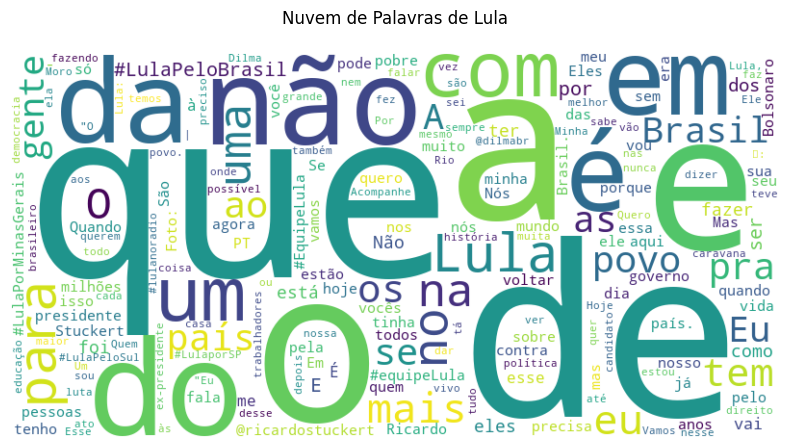

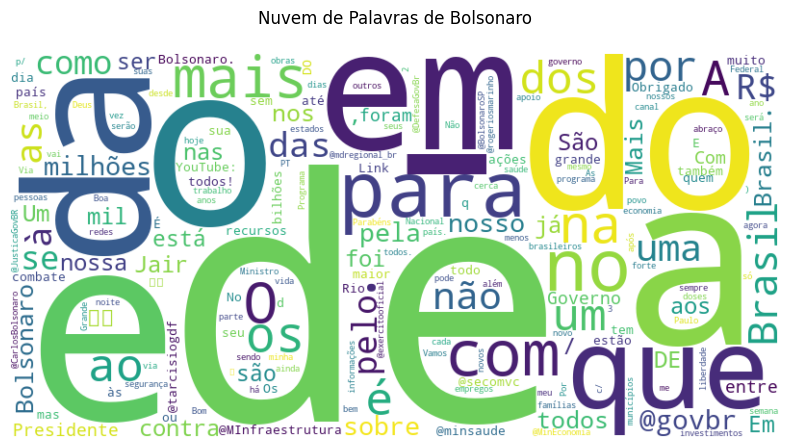

In [89]:
generate_wordcloud_from_df_column(lula_df, 'tweet', 'Lula')
generate_wordcloud_from_df_column(bolsonaro_df, 'tweet', 'Bolsonaro')

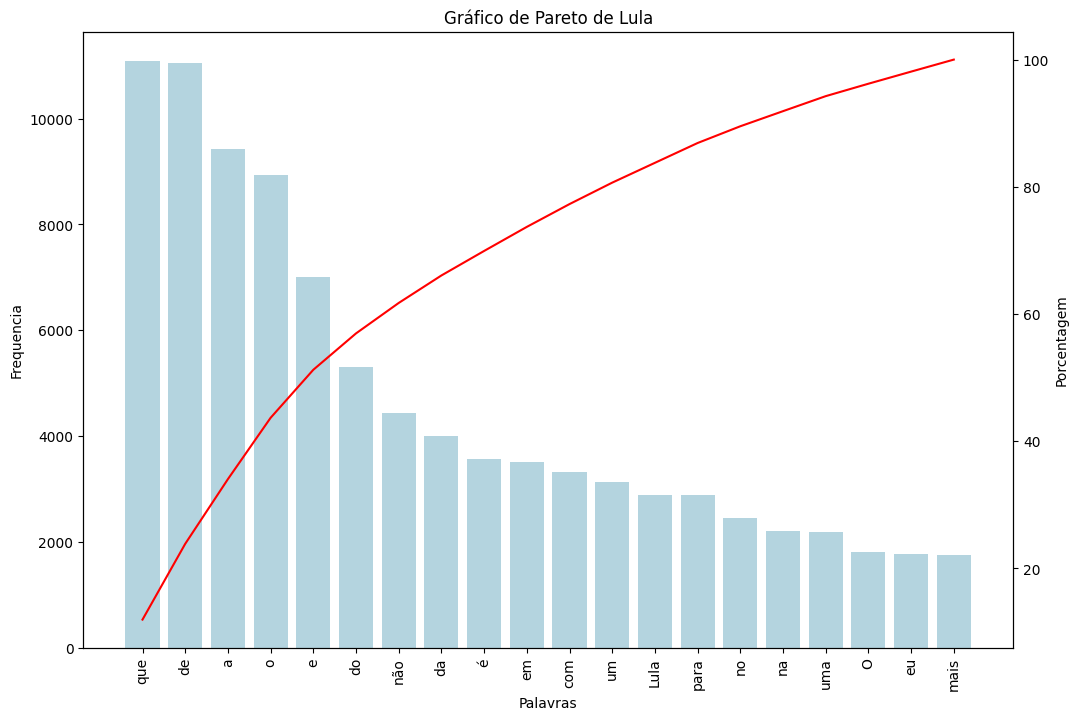

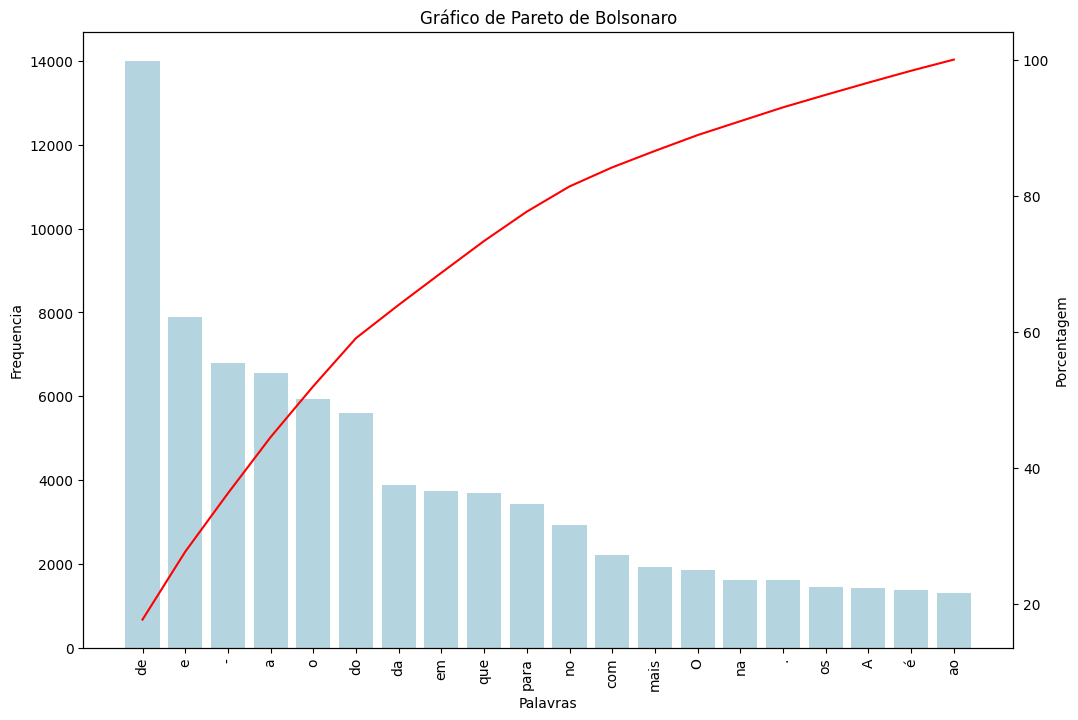

In [90]:
graf_pareto(lula_df, "tweet", 20, 'Lula')
graf_pareto(bolsonaro_df, "tweet", 20, 'Bolsonaro')

In [91]:
lula_df['tweet']

0        O Brasil piorou. A nova pesquisa do boletim De...
1        N√≥s estamos disputando com algu√©m que prometeu...
2        As mentiras contra Lula j√° aconteciam antes me...
3        Aprendi com minha m√£e a n√£o desistir. Quando v...
4        "Um dos meus sonhos √© um dia estudar medicina....
                               ...                        
15135    "Os trabalhadores est√£o com @dilmabr ",  diz o...
15136    @dilmabr e Lula saem agora pelas ruas de S√£o B...
15137    Lula visita o @smabc e cumprimenta sindicalist...
15138    Acompanhe not√≠cias da caminhada tamb√©m pelo @p...
15139    Lula acaba de chegar ao @smabc de onde come√ßar...
Name: tweet, Length: 15140, dtype: object

### Limpeza

Nessa etapa, removeu-se as *stop words*, sendo elas o conjunto pre-setado do corpus do nltk, √† exce√ß√£o de palavras na negativa (que poderiam agregar valor no processamento). Al√©m disso, excluiu-se palavras comuns e sem valor que forma observadas nos tu√≠tes e que escapavam √†s *stop words*. Excluiu-se tamb√©m a pontua√ß√£o e tipos de texto muito utilizados em tu√≠tes: *hashtags*, *cashtags*, *links* e afins. Essas √∫ltimas exclus√µes foram feitas utilizando Regex. Por fim, gerou-se as mesmas visualiza√ß√µes de antes, a fim de destacar as diferen√ßas.

In [256]:
def regex_remove_accents(word):
    """
    Removes common accent characters, lower form.
    Uses: regex.
    Author: https://stackoverflow.com/users/4725707/rigonz

    *w/ small changes for applicability*
    """
    word = re.sub(r'[√†√°√¢√£√§√•]', 'a', word)
    word = re.sub(r'[√®√©√™√´]', 'e', word)
    word = re.sub(r'[√¨√≠√Æ√Ø]', 'i', word)
    word = re.sub(r'[√≤√≥√¥√µ√∂]', 'o', word)
    word = re.sub(r'[√π√∫√ª√º]', 'u', word)
    word = re.sub(r'[√ß]', 'c', word) # addition for this case
    return word

def remove_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # s√≠mbolos y pictogramas
                               u"\U0001F680-\U0001F6FF"  # transportes y s√≠mbolos mapas
                               u"\U0001F700-\U0001F77F"  # s√≠mbolos alquimia
                               u"\U0001F780-\U0001F7FF"  # s√≠mbolos marcap√°ginas
                               u"\U0001F800-\U0001F8FF"  # s√≠mbolos y pictogramas suplemento
                               u"\U0001F900-\U0001F9FF"  # emojis diversos
                               u"\U0001FA00-\U0001FA6F"  # emojis adicionales
                               u"\U0001FA70-\U0001FAFF"  # s√≠mbolos de juego de cartas
                               u"\U00002702-\U000027B0"  # dingbats
                               u"\U000024C2-\U0001F251" 
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def regex_filter(texto:str)->str:
    """
    Removes unhelpful types of caracteres or  of string of caracteres, such as
    links, hash e cashtags, mentions, multiple spaces, numbers (here, it wont be useful),
    repeated caracteres and special caracteres.
    Uses: regex.
    Author: Larissa Kelmer
    """
    tweet = re.sub('https?:\/\/[a-zA-Z0-9@:%._\/+~#=?&;-]*', ' ', texto) #removal of links
    tweet = re.sub('\$[a-zA-Z0-9]*', ' ', tweet) #remove cashtags
    tweet = re.sub('\#[a-zA-Z0-9]*', ' ', tweet) #remove hastags
    tweet = re.sub('\@[a-zA-Z0-9]*', ' ', tweet) #remove men√ß√µes
    tweet = re.sub(r'(\W)\1+', r'\1', tweet) #remove repeated caracteres
    #tweet = re.sub(r'\b\d+(?:\.\d+)?\s+', ' ', tweet) #remove multiples numbers
    #tweet = re.sub(r'(.)\1+', r'\1\1', tweet) #remove repeated caracteres
    tweet = re.sub(r'_', ' ', tweet) #remove underscore
    tweet = re.sub(r'\b[b-df-hj-np-tv-z]\b', '', tweet) #Remove consoantes solit√°rias
    tweet = re.sub(r'\b\d+\b', '', tweet) # Remove n√∫meros
    tweet = re.sub(r'\b\.\b', '', tweet)
    tweet = re.sub(r'\b[√†√°√¢√£√§√•√®√©√™√´√¨√≠√Æ√Ø√≤√≥√¥√µ√∂√π√∫√ª√º]\b', '', tweet)
    tweet = tweet.strip(string.punctuation) #separating punctuation from words
    tweet = re.sub(r'\t', '', tweet) #remove tab
    tweet = re.sub(r'\s+', ' ', tweet)#remove extra blank spaces

    return tweet

In [257]:
stop_words = nltk.corpus.stopwords.words('portuguese')
stop_words = ([sw.lower() for sw in stop_words if (sw!='n√£o' and sw!='nem')])
print('Stop words: ', stop_words)

#adicionando pontua√ß√£o nas pontua√ß√µes a serem removidas
pontuacao = ['),', '",','...','/']
for ponto in punctuation:
  pontuacao.append(ponto)
print('Pontua√ß√£o: ', punctuation)

#adicionando algumas palavras dos tu√≠tes que n√£o contribuem
extra = ['_br', 'v√≠deo', 'vai', 'foto', 'Eu', 'a', 'pra', 'Ricardo', 'stuckert'
         'O', '\n', 'ent√£o', 'youtube','toda','todo','todas','todos','tambem',
         'ate','sobr','_br', 'aqui', 'fazer', 'casa', 'agora', 'ter', 'sobre',
         'coisa', 'ele', 'precisa', 'preciso', 'hoje', 'quer', 'voce', 'porque', 
         'j√°', 'l√°', 'ao vivo', 'quero', 'pode', 'eu', 'desde', 'via', 'ap√≥s', 'via',
         'ao', 'vivo', 'r', '   ']
extra = ([word.lower() for word in extra])

stop_words = pontuacao + extra + stop_words
#stop_words = set([regex_remove_accents(texto) for texto in stop_words])
#stop_words_sem_acento = [unidecode.unidecode(texto) for texto in stop_words_final]
print(stop_words)


def remove_stopwords(texto:str)->str:
    if isinstance(texto, str):
        texto = remove_emojis(texto)
        tokens = tokenize.WhitespaceTokenizer().tokenize(texto.lower())
        tokens_sem_stopwords = [regex_filter(word) for word in tokens if word.lower() not in stop_words]
        texto_sem_stopwords = ' '.join(tokens_sem_stopwords)
        return texto_sem_stopwords
    else:
        return texto

Stop words:  ['a', '√†', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', '√†s', 'at√©', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles', 'depois', 'do', 'dos', 'e', '√©', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'era', 'eram', '√©ramos', 'essa', 'essas', 'esse', 'esses', 'esta', 'est√°', 'estamos', 'est√£o', 'estar', 'estas', 'estava', 'estavam', 'est√°vamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estiv√©ramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estiv√©ssemos', 'estou', 'eu', 'foi', 'fomos', 'for', 'fora', 'foram', 'f√¥ramos', 'forem', 'formos', 'fosse', 'fossem', 'f√¥ssemos', 'fui', 'h√°', 'haja', 'hajam', 'hajamos', 'h√£o', 'havemos', 'haver', 'hei', 'houve', 'houvemos', 'houver', 'houvera', 'houver√°', 'houveram', 'houv√©ramos', 'houver√£o', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houver√≠amos', 'houvermos', 'ho

In [258]:
lula_df['tweet'] = lula_df['tweet'].str.lower()
bolsonaro_df['tweet'] = bolsonaro_df['tweet'].str.lower()

lula_df = lula_df.applymap(str)
bolsonaro_df = bolsonaro_df.applymap(str)

lula_df["tratamento_1"] = lula_df["tweet"].apply(remove_stopwords)
bolsonaro_df["tratamento_1"] = bolsonaro_df["tweet"].apply(remove_stopwords)

In [259]:
lula_df['tratamento_1'].replace('', np.nan, inplace=True)
lula_df.dropna(subset=['tratamento_1'], inplace=True)

bolsonaro_df['tratamento_1'].replace('', np.nan, inplace=True)
bolsonaro_df.dropna(subset=['tratamento_1'], inplace=True)

In [260]:
lula_df[['tweet', 'tratamento_1']].head(5)

tweet  \
0                                     o brasil piorou. a nova pesquisa do boletim desigualdades nas metr√≥poles mostra o que j√° vemos pelas ruas: aumento da mis√©ria, fome e fam√≠lias sem um teto pra viver. resultado de um governo que foi irrespons√°vel por quatro anos e agora quer fingir trabalhar. #equipelula   
1                                           n√≥s estamos disputando com algu√©m que prometeu gerar empregos com uma carteira de trabalho verde e amarela, mas eu quero saber quem √© que est√° trabalhando com a tal da carteira. acabaram com a carteira de trabalho e tiraram o direito dos trabalhadores brasileiros.   
2                as mentiras contra lula j√° aconteciam antes mesmo de existir o nome fake news. t√∫nel escondido de s√£o bernardo para o morumbi, mans√£o no guaruj√°‚Ä¶ mesmo com tantas mentiras, lula sempre provou que √© inocente. espalhe @verdadenarede. #equipelula https://t.co/iewoqijwvb https://t.co/m98oxdxis9   
3                                                                                                       aprendi com minha m√£e a n√£o desistir. quando voc√™s estiverem desanimados, lembrem de mim. levantem a cabe√ßa e pe√ßam disposi√ß√£o, porque quem n√£o tem disposi√ß√£o n√£o ganha nada. bom dia e boa semana pra n√≥s.   
4  "um dos meus sonhos √© um dia estudar medicina. sei que tenho que estudar muito para ser aprovado no enem ou etc. gra√ßas a voc√™, filho de pobre tem chance de entrar em uma universidade. lula voc√™ √© esperan√ßa!" - yuri, de guaribas, piau√≠, 13 anos ‚ù§Ô∏è#equipelula\n\nüé•: @ricardostuckert https://t.co/sddrxoo52w   

                                                                                                                                                                             tratamento_1  
0  brasil piorou nova pesquisa boletim desigualdades metr√≥poles mostra vemos ruas aumento mis√©ria fome fam√≠lias teto viver resultado governo irrespons√°vel quatro anos fingir trabalhar    
1           disputando algu√©m prometeu gerar empregos carteira trabalho verde amarela saber trabalhando tal carteira acabaram carteira trabalho tiraram direito trabalhadores brasileiros  
2               mentiras contra lula aconteciam antes existir nome fake news t√∫nel escondido bernardo morumbi mans√£o guaruj√°‚Ä¶ tantas mentiras lula sempre provou inocente espalhe          
3                                                  aprendi m√£e n√£o desistir desanimados lembrem mim levantem cabe√ßa pe√ßam disposi√ß√£o n√£o disposi√ß√£o n√£o ganha nada bom dia boa semana n√≥s  
4                          um sonhos dia estudar medicina sei estudar aprovado enem etc gra√ßas voc√™ filho pobre chance entrar universidade lula esperan√ßa yuri guaribas piau√≠  anos

In [261]:
bolsonaro_df[['tweet', 'tratamento_1']].head(5)

tweet  \
0                                                                                                                                                                  acompanhe, no hor√°rio, ao vivo, pelo canal do flow podcast: https://t.co/eztlteqveu https://t.co/mmhjnptc7m   
1                                                                                                                                                   - entre os planos aplicados pela atual gest√£o tamb√©m est√° a carteira de desestatiza√ß√£o classificada como a maior do mundo.   
2                                               - recentemente priorizando o saneamento b√°sico e infraestrutura, o bndes anunciou tamb√©m pareceria com o sebrae para criar um fundo garantidor voltado para empreendedores individuais, al√©m de micros e pequenos empres√°rios.   
3  - longe do pt,  bndes que patrocinava obras em ditaduras socialistas deixando de fora investimentos no üáßüá∑ al√©m de outras movimenta√ß√µes sombrias, hoje o √≥rg√£o recebeu a premia√ß√£o de ‚Äútransforma√ß√£o banc√°ria‚Äù da am√©rica latina do euromoney awards for excellence em 2022.   
4                  - tamb√©m, a amplia√ß√£o do teto do financiamento para o curso de medicina foi aumentado em mais de 20%, em 2022, sendo mais uma novidade aos estudantes da √°rea de sa√∫de.\n \n- implemento de 22,8% passando do atual valor, r$ 42.983,70, para r$ 52.805,66.   

                                                                                                                                                                                                    tratamento_1  
0                                                                                                                                                                  acompanhe hor√°rio vivo canal flow podcast      
1                                                                                                                                 planos aplicados atual gest√£o carteira desestatiza√ß√£o classificada maior mundo  
2                           recentemente priorizando saneamento b√°sico infraestrutura bndes anunciou pareceria sebrae criar fundo garantidor voltado empreendedores individuais al√©m micros pequenos empres√°rios  
3  longe pt bndes patrocinava obras ditaduras socialistas deixando investimentos al√©m outras movimenta√ß√µes sombrias √≥rg√£o recebeu premia√ß√£o ‚Äútransforma√ß√£o banc√°ria‚Äù am√©rica latina euromoney awards excellence   
4                                                                     tamb√©m amplia√ß√£o teto financiamento curso medicina aumentado   sendo novidade estudantes √°rea sa√∫de implemento  passando atual valor

In [262]:
lula_df['tratamento_1'][10]

' chegaram facebook acompanha lula l√° vem curtir compartilhar ajudar conte√∫do chegar longe      '

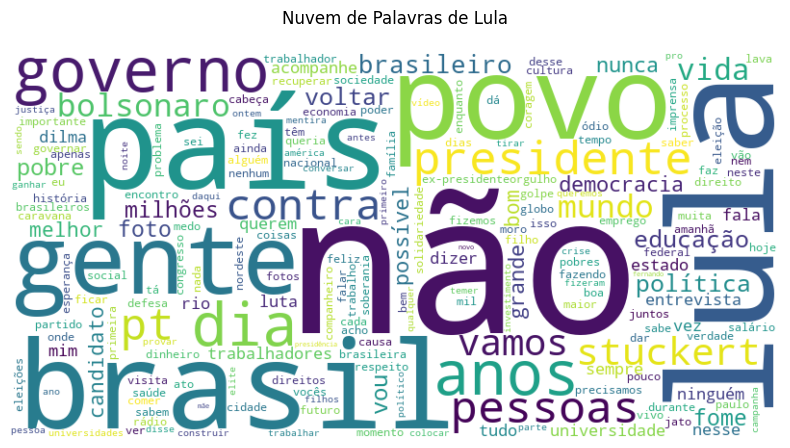

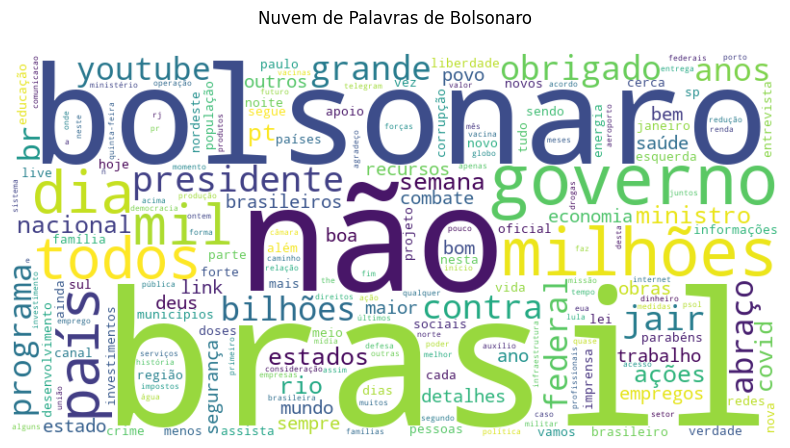

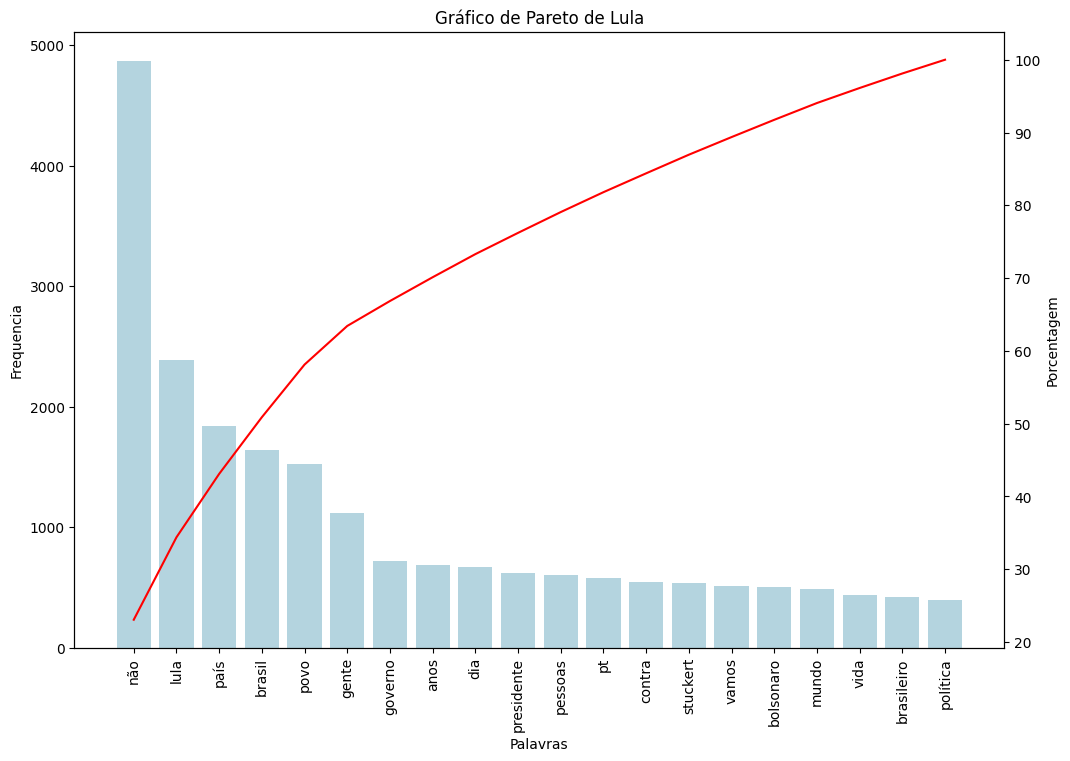

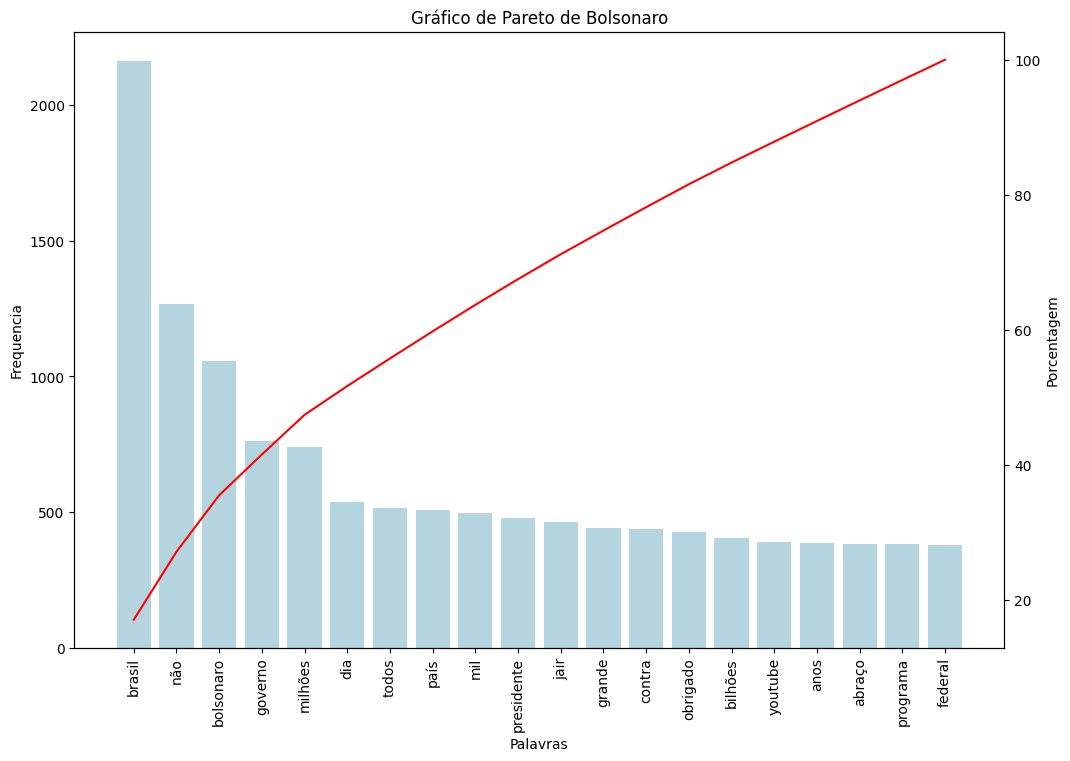

In [263]:
generate_wordcloud_from_df_column(lula_df, 'tratamento_1', 'Lula')
generate_wordcloud_from_df_column(bolsonaro_df, 'tratamento_1', 'Bolsonaro')

graf_pareto(lula_df, "tratamento_1", 20, 'Lula')
graf_pareto(bolsonaro_df, "tratamento_1", 20, 'Bolsonaro')

### Tokeniza√ß√£o

 A tokeniza√ß√£o √© o processo de dividir um texto em unidades menores chamadas tokens. Estes tokens podem ser palavras individuais, subpalavras, caracteres ou at√© mesmo frases completas, dependendo do objetivo da an√°lise. A tokeniza√ß√£o √© uma etapa fundamental no pr√©-processamento de dados em PLN, pois ajuda a transformar o texto em uma forma que possa ser facilmente manipulada e processada por algoritmos de aprendizado de m√°quina. Essa t√©cnica √© crucial em v√°rias tarefas de PLN, como an√°lise de sentimentos, tradu√ß√£o autom√°tica, reconhecimento de entidades nomeadas e muito mais, pois fornece a base para a an√°lise textual.

In [272]:
def tokenize_tweet(tweet):
    tokens = re.findall(r"[\w']+", tweet.lower())
    return tokens

bolsonaro_df['tokens'] = bolsonaro_df['tweet'].apply(tokenize_tweet)
lula_df['tokens'] = lula_df['tweet'].apply(tokenize_tweet)

In [273]:
bolsonaro_df[['tweet', 'tokens']].head()

tweet  \
0                                                                                                                                                                  acompanhe, no hor√°rio, ao vivo, pelo canal do flow podcast: https://t.co/eztlteqveu https://t.co/mmhjnptc7m   
1                                                                                                                                                   - entre os planos aplicados pela atual gest√£o tamb√©m est√° a carteira de desestatiza√ß√£o classificada como a maior do mundo.   
2                                               - recentemente priorizando o saneamento b√°sico e infraestrutura, o bndes anunciou tamb√©m pareceria com o sebrae para criar um fundo garantidor voltado para empreendedores individuais, al√©m de micros e pequenos empres√°rios.   
3  - longe do pt,  bndes que patrocinava obras em ditaduras socialistas deixando de fora investimentos no üáßüá∑ al√©m de outras movimenta√ß√µes sombrias, hoje o √≥rg√£o recebeu a premia√ß√£o de ‚Äútransforma√ß√£o banc√°ria‚Äù da am√©rica latina do euromoney awards for excellence em 2022.   
4                  - tamb√©m, a amplia√ß√£o do teto do financiamento para o curso de medicina foi aumentado em mais de 20%, em 2022, sendo mais uma novidade aos estudantes da √°rea de sa√∫de.\n \n- implemento de 22,8% passando do atual valor, r$ 42.983,70, para r$ 52.805,66.   

                                                                                                                                                                                                                                                                                                     tokens  
0                                                                                                                                                                                    [acompanhe, no, hor√°rio, ao, vivo, pelo, canal, do, flow, podcast, https, t, co, eztlteqveu, https, t, co, mmhjnptc7m]  
1                                                                                                                                                               [entre, os, planos, aplicados, pela, atual, gest√£o, tamb√©m, est√°, a, carteira, de, desestatiza√ß√£o, classificada, como, a, maior, do, mundo]  
2                                                  [recentemente, priorizando, o, saneamento, b√°sico, e, infraestrutura, o, bndes, anunciou, tamb√©m, pareceria, com, o, sebrae, para, criar, um, fundo, garantidor, voltado, para, empreendedores, individuais, al√©m, de, micros, e, pequenos, empres√°rios]  
3  [longe, do, pt, bndes, que, patrocinava, obras, em, ditaduras, socialistas, deixando, de, fora, investimentos, no, al√©m, de, outras, movimenta√ß√µes, sombrias, hoje, o, √≥rg√£o, recebeu, a, premia√ß√£o, de, transforma√ß√£o, banc√°ria, da, am√©rica, latina, do, euromoney, awards, for, excellence, em, 2022]  
4                  [tamb√©m, a, amplia√ß√£o, do, teto, do, financiamento, para, o, curso, de, medicina, foi, aumentado, em, mais, de, 20, em, 2022, sendo, mais, uma, novidade, aos, estudantes, da, √°rea, de, sa√∫de, implemento, de, 22, 8, passando, do, atual, valor, r, 42, 983, 70, para, r, 52, 805, 66]

In [274]:
lula_df[['tweet', 'tokens']].head()

tweet  \
0                                     o brasil piorou. a nova pesquisa do boletim desigualdades nas metr√≥poles mostra o que j√° vemos pelas ruas: aumento da mis√©ria, fome e fam√≠lias sem um teto pra viver. resultado de um governo que foi irrespons√°vel por quatro anos e agora quer fingir trabalhar. #equipelula   
1                                           n√≥s estamos disputando com algu√©m que prometeu gerar empregos com uma carteira de trabalho verde e amarela, mas eu quero saber quem √© que est√° trabalhando com a tal da carteira. acabaram com a carteira de trabalho e tiraram o direito dos trabalhadores brasileiros.   
2                as mentiras contra lula j√° aconteciam antes mesmo de existir o nome fake news. t√∫nel escondido de s√£o bernardo para o morumbi, mans√£o no guaruj√°‚Ä¶ mesmo com tantas mentiras, lula sempre provou que √© inocente. espalhe @verdadenarede. #equipelula https://t.co/iewoqijwvb https://t.co/m98oxdxis9   
3                                                                                                       aprendi com minha m√£e a n√£o desistir. quando voc√™s estiverem desanimados, lembrem de mim. levantem a cabe√ßa e pe√ßam disposi√ß√£o, porque quem n√£o tem disposi√ß√£o n√£o ganha nada. bom dia e boa semana pra n√≥s.   
4  "um dos meus sonhos √© um dia estudar medicina. sei que tenho que estudar muito para ser aprovado no enem ou etc. gra√ßas a voc√™, filho de pobre tem chance de entrar em uma universidade. lula voc√™ √© esperan√ßa!" - yuri, de guaribas, piau√≠, 13 anos ‚ù§Ô∏è#equipelula\n\nüé•: @ricardostuckert https://t.co/sddrxoo52w   

                                                                                                                                                                                                                                                                                                                                          tokens  
0                         [o, brasil, piorou, a, nova, pesquisa, do, boletim, desigualdades, nas, metr√≥poles, mostra, o, que, j√°, vemos, pelas, ruas, aumento, da, mis√©ria, fome, e, fam√≠lias, sem, um, teto, pra, viver, resultado, de, um, governo, que, foi, irrespons√°vel, por, quatro, anos, e, agora, quer, fingir, trabalhar, equipelula]  
1                             [n√≥s, estamos, disputando, com, algu√©m, que, prometeu, gerar, empregos, com, uma, carteira, de, trabalho, verde, e, amarela, mas, eu, quero, saber, quem, √©, que, est√°, trabalhando, com, a, tal, da, carteira, acabaram, com, a, carteira, de, trabalho, e, tiraram, o, direito, dos, trabalhadores, brasileiros]  
2         [as, mentiras, contra, lula, j√°, aconteciam, antes, mesmo, de, existir, o, nome, fake, news, t√∫nel, escondido, de, s√£o, bernardo, para, o, morumbi, mans√£o, no, guaruj√°, mesmo, com, tantas, mentiras, lula, sempre, provou, que, √©, inocente, espalhe, verdadenarede, equipelula, https, t, co, iewoqijwvb, https, t, co, m98oxdxis9]  
3                                                                                                     [aprendi, com, minha, m√£e, a, n√£o, desistir, quando, voc√™s, estiverem, desanimados, lembrem, de, mim, levantem, a, cabe√ßa, e, pe√ßam, disposi√ß√£o, porque, quem, n√£o, tem, disposi√ß√£o, n√£o, ganha, nada, bom, dia, e, boa, semana, pra, n√≥s]  
4  [um, dos, meus, sonhos, √©, um, dia, estudar, medicina, sei, que, tenho, que, estudar, muito, para, ser, aprovado, no, enem, ou, etc, gra√ßas, a, voc√™, filho, de, pobre, tem, chance, de, entrar, em, uma, universidade, lula, voc√™, √©, esperan√ßa, yuri, de, guaribas, piau√≠, 13, anos, equipelula, ricardostuckert, https, t, co, sddrxoo52w]

In [277]:
bolsonaro_df['tokens'] = bolsonaro_df['tratamento_1'].apply(tokenize_tweet)
bolsonaro_df['tokens']

0                                                                                                                                                                                          [acompanhe, hor√°rio, vivo, canal, flow, podcast]
1                                                                                                                                                  [planos, aplicados, atual, gest√£o, carteira, desestatiza√ß√£o, classificada, maior, mundo]
2                                  [recentemente, priorizando, saneamento, b√°sico, infraestrutura, bndes, anunciou, pareceria, sebrae, criar, fundo, garantidor, voltado, empreendedores, individuais, al√©m, micros, pequenos, empres√°rios]
3        [longe, pt, bndes, patrocinava, obras, ditaduras, socialistas, deixando, investimentos, al√©m, outras, movimenta√ß√µes, sombrias, √≥rg√£o, recebeu, premia√ß√£o, transforma√ß√£o, banc√°ria, am√©rica, latina, euromoney, awards, excellence]
4                                     

In [278]:
lula_df['tokens'] = lula_df['tratamento_1'].apply(tokenize_tweet)

In [ ]:
lula_df['tweet'] = lula_df['tweet'].str.lower()
bolsonaro_df['tweet'] = bolsonaro_df['tweet'].str.lower()

lula_df = lula_df.applymap(str)
bolsonaro_df = bolsonaro_df.applymap(str)

lula_df["tratamento_1"] = lula_df["tweet"].apply(remove_stopwords)
bolsonaro_df["tratamento_1"] = bolsonaro_df["tweet"].apply(remove_stopwords)

#### N-grams

N-grams s√£o sequ√™ncias de n itens consecutivos, geralmente palavras, em um texto. Eles capturam informa√ß√µes sobre a estrutura e o contexto do texto, sendo √∫teis em tarefas de PLN como modelagem de linguagem e extra√ß√£o de caracter√≠sticas. Ao analisar sequ√™ncias de palavras, os n-grams ajudam a compreender o contexto e a extrair informa√ß√µes relevantes dos dados textuais.

In [282]:
# Extrair bigramas e trigramas para Bolsonaro
bolsonaro_df['bigrams'] = bolsonaro_df['tokens'].apply(lambda x: list(nltk.bigrams(x)))
bolsonaro_df['trigrams'] = bolsonaro_df['tokens'].apply(lambda x: list(nltk.ngrams(x, 3)))

# Extrair bigramas e trigramas para Lula
lula_df['bigrams'] = lula_df['tokens'].apply(lambda x: list(nltk.bigrams(x)))
lula_df['trigrams'] = lula_df['tokens'].apply(lambda x: list(nltk.ngrams(x, 3)))

# Visualizar os resultados
bolsonaro_df[['tokens', 'bigrams', 'trigrams']].head()
lula_df[['tokens', 'bigrams', 'trigrams']].head()

tokens  \
0  [brasil, piorou, nova, pesquisa, boletim, desigualdades, metr√≥poles, mostra, vemos, ruas, aumento, mis√©ria, fome, fam√≠lias, teto, viver, resultado, governo, irrespons√°vel, quatro, anos, fingir, trabalhar]   
1            [disputando, algu√©m, prometeu, gerar, empregos, carteira, trabalho, verde, amarela, saber, trabalhando, tal, carteira, acabaram, carteira, trabalho, tiraram, direito, trabalhadores, brasileiros]   
2                       [mentiras, contra, lula, aconteciam, antes, existir, nome, fake, news, t√∫nel, escondido, bernardo, morumbi, mans√£o, guaruj√°, tantas, mentiras, lula, sempre, provou, inocente, espalhe]   
3                                                  [aprendi, m√£e, n√£o, desistir, desanimados, lembrem, mim, levantem, cabe√ßa, pe√ßam, disposi√ß√£o, n√£o, disposi√ß√£o, n√£o, ganha, nada, bom, dia, boa, semana, n√≥s]   
4                               [um, sonhos, dia, estudar, medicina, sei, estudar, aprovado, enem, etc, gra√ßas, voc√™, filho, pobre, chance, entrar, universidade, lula, esperan√ßa, yuri, guaribas, piau√≠, anos]   

                                                                                                                                                                                                                                                                                                                                                                                                                                             bigrams  \
0  [(brasil, piorou), (piorou, nova), (nova, pesquisa), (pesquisa, boletim), (boletim, desigualdades), (desigualdades, metr√≥poles), (metr√≥poles, mostra), (mostra, vemos), (vemos, ruas), (ruas, aumento), (aumento, mis√©ria), (mis√©ria, fome), (fome, fam√≠lias), (fam√≠lias, teto), (teto, viver), (viver, resultado), (resultado, governo), (governo, irrespons√°vel), (irrespons√°vel, quatro), (quatro, anos), (anos, fingir), (fingir, trabalhar)]   
1                                  [(disputando, algu√©m), (algu√©m, prometeu), (prometeu, gerar), (gerar, empregos), (empregos, carteira), (carteira, trabalho), (trabalho, verde), (verde, amarela), (amarela, saber), (saber, trabalhando), (trabalhando, tal), (tal, carteira), (carteira, acabaram), (acabaram, carteira), (carteira, trabalho), (trabalho, tiraram), (tiraram, direito), (direito, trabalhadores), (trabalhadores, brasileiros)]   
2                                              [(mentiras, contra), (contra, lula), (lula, aconteciam), (aconteciam, antes), (antes, existir), (existir, nome), (nome, fake), (fake, news), (news, t√∫nel), (t√∫nel, escondido), (escondido, bernardo), (bernardo, morumbi), (morumbi, mans√£o), (mans√£o, guaruj√°), (guaruj√°, tantas), (tantas, mentiras), (mentiras, lula), (lula, sempre), (sempre, provou), (provou, inocente), (inocente, espalhe)]   
3                                                                                                 [(aprendi, m√£e), (m√£e, n√£o), (n√£o, desistir), (desistir, desanimados), (desanimados, lembrem), (lembrem, mim), (mim, levantem), (levantem, cabe√ßa), (cabe√ßa, pe√ßam), (pe√ßam, disposi√ß√£o), (disposi√ß√£o, n√£o), (n√£o, disposi√ß√£o), (disposi√ß√£o, n√£o), (n√£o, ganha), (ganha, nada), (nada, bom), (bom, dia), (dia, boa), (boa, semana), (semana, n√≥s)]   
4                                                   [(um, sonhos), (sonhos, dia), (dia, estudar), (estudar, medicina), (medicina, sei), (sei, estudar), (estudar, aprovado), (aprovado, enem), (enem, etc), (etc, gra√ßas), (gra√ßas, voc√™), (voc√™, filho), (filho, pobre), (pobre, chance), (chance, entrar), (entrar, universidade), (universidade, lula), (lula, esperan√ßa), (esperan√ßa, yuri), (yuri, guaribas), (guaribas, piau√≠), (piau√≠, anos)]   

                                                                                                                                                                                                                                 

In [292]:
def graf_pareto_n_grams(texto, coluna_texto, quantidade, nome):

    todos_ngramas = [' '.join(ngram) for ngrams_list in texto[coluna_texto] for ngram in ngrams_list]

    # Calcular as frequ√™ncias dos n-gramas
    frequencias = nltk.FreqDist(todos_ngramas)

    # Criar um DataFrame com as frequ√™ncias dos n-gramas
    df_frequencias = pd.DataFrame({'N-gramas': frequencias.keys(),
                                   'Frequ√™ncia': frequencias.values()})

    # Selecionar os n-gramas mais frequentes
    df_frequencias = df_frequencias.nlargest(n=quantidade, columns='Frequ√™ncia')

    # Calcular a porcentagem acumulada
    total = df_frequencias['Frequ√™ncia'].sum()
    df_frequencias['Porcentagem'] = (df_frequencias['Frequ√™ncia'].cumsum() / total) * 100

    # Plotar o gr√°fico de Pareto
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(data=df_frequencias, x='N-gramas', y='Frequ√™ncia', color='lightblue')
    ax2 = ax.twinx()
    sns.lineplot(data=df_frequencias, x='N-gramas', y='Porcentagem', color='red', sort=False, ax=ax2)
    plt.title('Gr√°fico de Pareto de ' + nome)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.show()

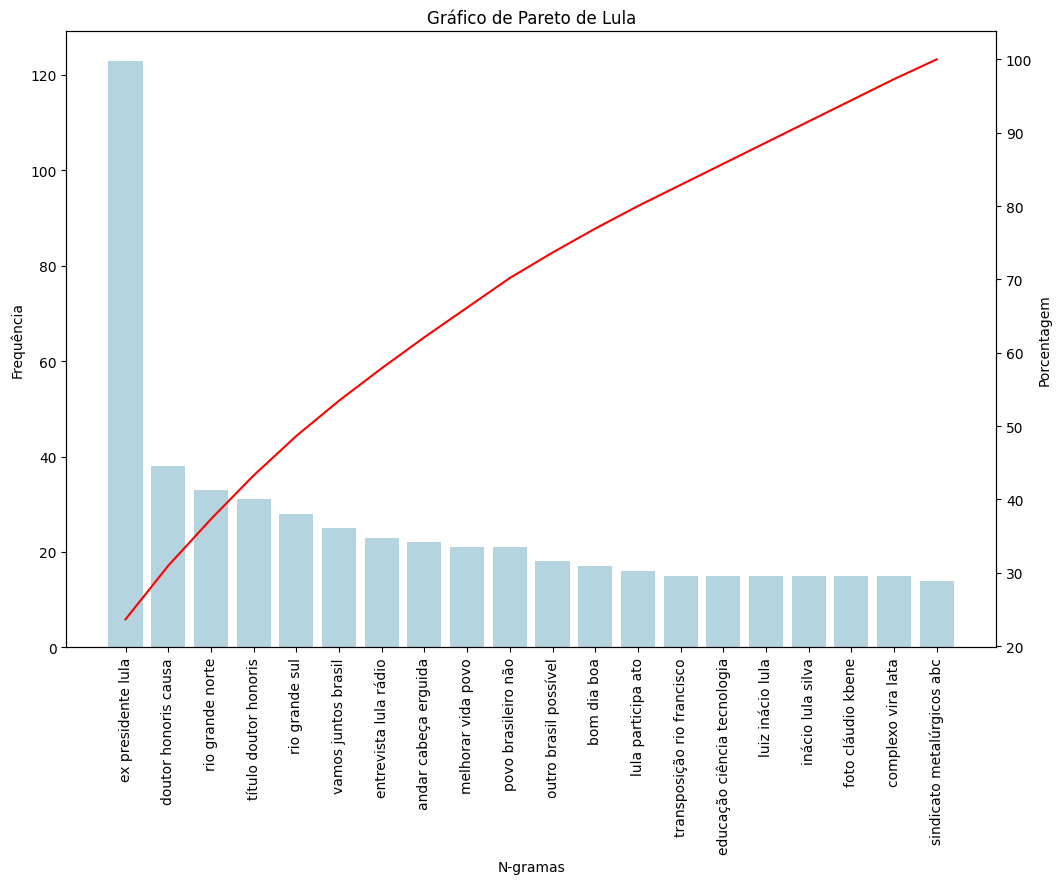

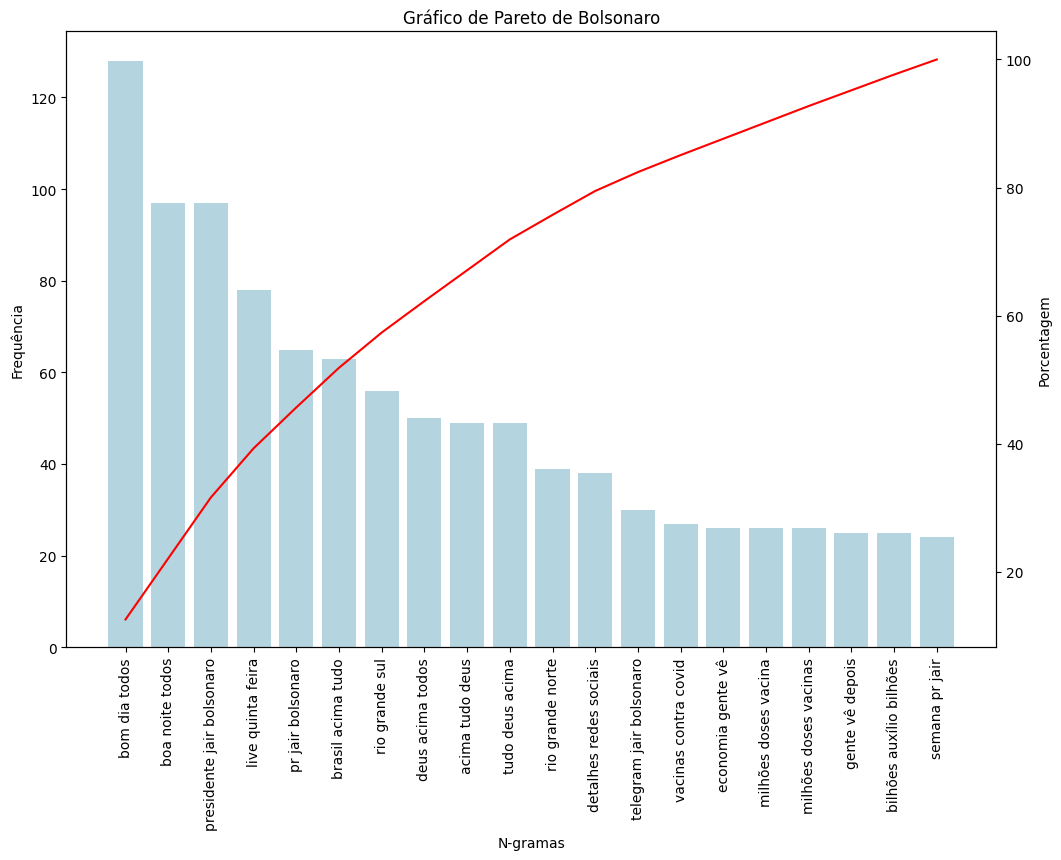

In [293]:
graf_pareto_n_grams(lula_df, 'trigrams', 20, 'Lula')
graf_pareto_n_grams(bolsonaro_df, 'trigrams', 20, 'Bolsonaro')

### Feature Extraction

Feature extraction √© o processo de transformar dados em representa√ß√µes num√©ricas que capturam informa√ß√µes de maior relev√¢ncia. Ele permite processar e tirar *insights* de modelos complexos.

#### Embeddings

Embeddings s√£o representa√ß√µes vetoriais de palavras e permitem a transforma√ß√£o dessas palavras para formatos num√©ricos que capturam a sem√¢ntica do texto. O Spacy usa uma CNN para esse c√°lculo por *default*. √â de interesse usar o BERT numa pr√≥xima etapa. 

In [294]:
def generate_embeddings(tokens):
    embeddings = []
    for token in tokens:
        embedding = nlp(token).vector
        embeddings.append(embedding)
    return embeddings

lula_df["embeddings_uni"] = lula_df['tokens'].apply(lambda x: generate_embeddings(x))
bolsonaro_df["embeddings_uni"] = bolsonaro_df['tokens'].apply(lambda x: generate_embeddings(x))

In [295]:
lula_df["embeddings_uni"]

0              [[0.94597495, -1.4509016, -0.7242687, -2.5647259, 1.6869419, -4.6141977, -0.25251797, -1.3752345, -5.2429066, -0.026394606, 1.4919624, -3.007764, -3.0420983, 0.5825694, -1.3168366, 1.8034259, 8.100355, 2.8696377, -3.8086133, -0.16515902, -0.57154626, 0.046026647, -3.233074, -2.4109745, 2.409361, 0.85668576, 1.7981569, -1.5379915, 2.404906, -3.0185142, 5.155394, -1.1705754, -2.0493333, 1.7879345, 3.9366999, 2.477941, -3.6461577, 6.102936, -1.288666, 1.1050164, -3.0956204, -3.786377, -3.7822561, -2.9995127, -2.6431947, -3.3033419, -2.6022453, -0.116508305, 0.6607145, 0.6449104, -4.1910353, 0.63138604, -1.65208, 3.9032502, -1.1970754, 1.0111655, 3.643776, -4.7509503, -3.0533512, 4.0299306, -3.7594702, 6.136184, -1.7213638, -0.58831465, 0.74594545, -2.136914, -1.8694478, 5.0960784, -3.7284198, 2.3691633, 0.76465213, -0.03270054, 6.9174795, 0.18335101, -0.68457454, 6.0676246, -0.9809929, 8.259279, -1.6937317, -1.5724638, -1.706291, 0.053837597, 2.3204384, 2.900614, -3.6790578

In [296]:
bolsonaro_df["embeddings_uni"]

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [ ]:
def get_bigram_embeddings(bigrams):
    embeddings = []
    for bigram in bigrams:
        if isinstance(bigram, tuple):
            bigram_str = ' '.join(bigram)
            tokens = nlp(bigram_str)
            if len(tokens) == 2:
                embedding = np.mean([token.vector for token in tokens], axis=0)
                embeddings.append(embedding)
    return embeddings


lula_df["embeddings"] = lula_df['bigrams'].apply(lambda x: get_bigram_embeddings(x))
bolsonaro_df["embeddings"] = bolsonaro_df['bigrams'].apply(lambda x: get_bigram_embeddings(x))

In [287]:
lula_df["embeddings"]

0                              [[-0.9532685, 1.8346896, -1.6068605, -1.5928378, -2.0871203, -1.9175644, 0.8824487, 0.527623, -1.507092, -0.1747185, 3.1382926, -1.5302312, -3.5262408, -0.46770692, -2.9872427, 0.15003407, 4.0942006, 5.151145, -2.116745, -1.7274919, -2.8302608, -1.2060572, -1.0191576, 1.2832198, -0.61039186, 0.9421127, 2.7422476, 1.5352337, 0.91025263, 1.964893, -1.476445, 0.009442225, -0.6001667, -0.61754096, 1.7491933, 1.1512958, -4.451543, 0.83882785, -2.4633017, -0.5958812, 1.1428708, -1.6415503, -1.1153834, -1.1737335, -0.5477996, -3.5181448, 1.0111573, 0.15958956, -1.5286623, -1.0707352, -1.626778, -0.7270168, 0.7998677, 2.8176303, 1.5773901, -1.4892603, -0.45971394, -2.3636255, -2.596085, 1.1583316, 0.51423824, 5.1765985, -0.10155791, -1.0217881, 2.1606996, 2.534383, -0.7045529, 4.3148518, -0.45008445, -1.855949, 7.7264695, -1.1892319, 2.6816304, 0.75519216, -0.15984035, 3.8182228, 0.49949622, 3.4371114, -1.542817, -2.284036, -3.1122983, 1.4038908, 3.2042086, -0.44

In [288]:
bolsonaro_df["embeddings"] 

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       